In [157]:
import pickle


output_dir='../PassGAN_data/GNPassGAN_12-02-2023/'
output_orig_dir='./output/' #output original del modelo preentrenado

with open(output_dir+'log.pkl', 'rb') as f:
    data=pickle.load(f)

with open(output_orig_dir+'log.pkl', 'rb') as f:
    data_orig=pickle.load(f)

In [124]:
!ls {output_dir}

charmap.pickle        js2.jpg               time.jpg
charmap_inv.pickle    js3.jpg               train_critic_cost.jpg
checkpoints           js4.jpg               train_gen_cost.jpg
js1.jpg               log.pkl


In [127]:
print(data.keys())

dict_keys(['time', 'train critic cost', 'train gen cost', 'js1', 'js2', 'js3', 'js4'])


In [167]:
import pandas as pd
def parser_to_df(data):
    df=pd.DataFrame.from_dict(data)
    
    #Añadir indice para plotear las iteraciones
    df = df.reset_index()
    df=df.rename(columns={'index': 'iteracion'})

    #Formatear a float
    df['train critic cost']=df['train critic cost'].astype(float)
    df['train gen cost']=df['train gen cost'].astype(float)

    #Quitar nulos para ploter js1,js2,..
    df_filter=df.dropna()

    return df, df_filter

In [168]:
df, df_filter=parser_to_df(data)
df_orig, df_filter_orig=parser_to_df(data_orig)

df.describe()

,iteracion,time,train critic cost,train gen cost,js1,js2,js3,js4
count,20001.000000,20001.000000,20001.000000,20001.000000,200.000000,200.000000,200.000000,200.000000
mean,10000.000000,7.551603,1.030013,0.919605,0.069099,0.193976,0.423862,0.670969
std,5773.935703,77.008213,0.071928,0.067970,0.044909,0.077919,0.078601,0.037171
min,0.000000,1.259974,0.672576,0.675240,0.039599,0.123255,0.342694,0.627592
25%,5000.000000,1.346050,0.988539,0.874479,0.051398,0.142160,0.366721,0.644143
50%,10000.000000,1.368411,1.059169,0.900834,0.061128,0.163353,0.384106,0.653945
75%,15000.000000,1.399907,1.083757,0.948347,0.069365,0.214015,0.460293,0.692419
max,20000.000000,1076.503026,1.212190,1.292223,0.441614,0.627159,0.722297,0.810108


## Análisis del modelo preentrendaodo de GNPassGAN

In [217]:

import matplotlib.pyplot as plt

def plot_variable(df,df_orig,mesure_col,yaxis_limit=False,xaxis_limit=False):
    fig, axs = plt.subplots(2)
    fig.set_dpi(500)
    plt.rcParams.update({'font.size': 5})
    plt.rc('axes', titlesize=5)     # fontsize of the axes title
    plt.rc('axes', labelsize=5)    # fontsize of the x and y labels

    axs[0].plot(df['iteracion'], df[mesure_col])
    axs[0].set_title(f"{mesure_col.title()} Orig")

    axs[1].plot(df_orig['iteracion'], df_orig[mesure_col])
    axs[1].set_title(f"{mesure_col.title()} del modelo {output_dir.split('/')[-2]}")
    
    if yaxis_limit:
        axs[0].set_ylim([1, 2.5])
        axs[1].set_ylim([0, 1])
        
    if xaxis_limit:
        axs[0].set_xlim([0, 20000])
        axs[1].set_xlim([0, 20000])


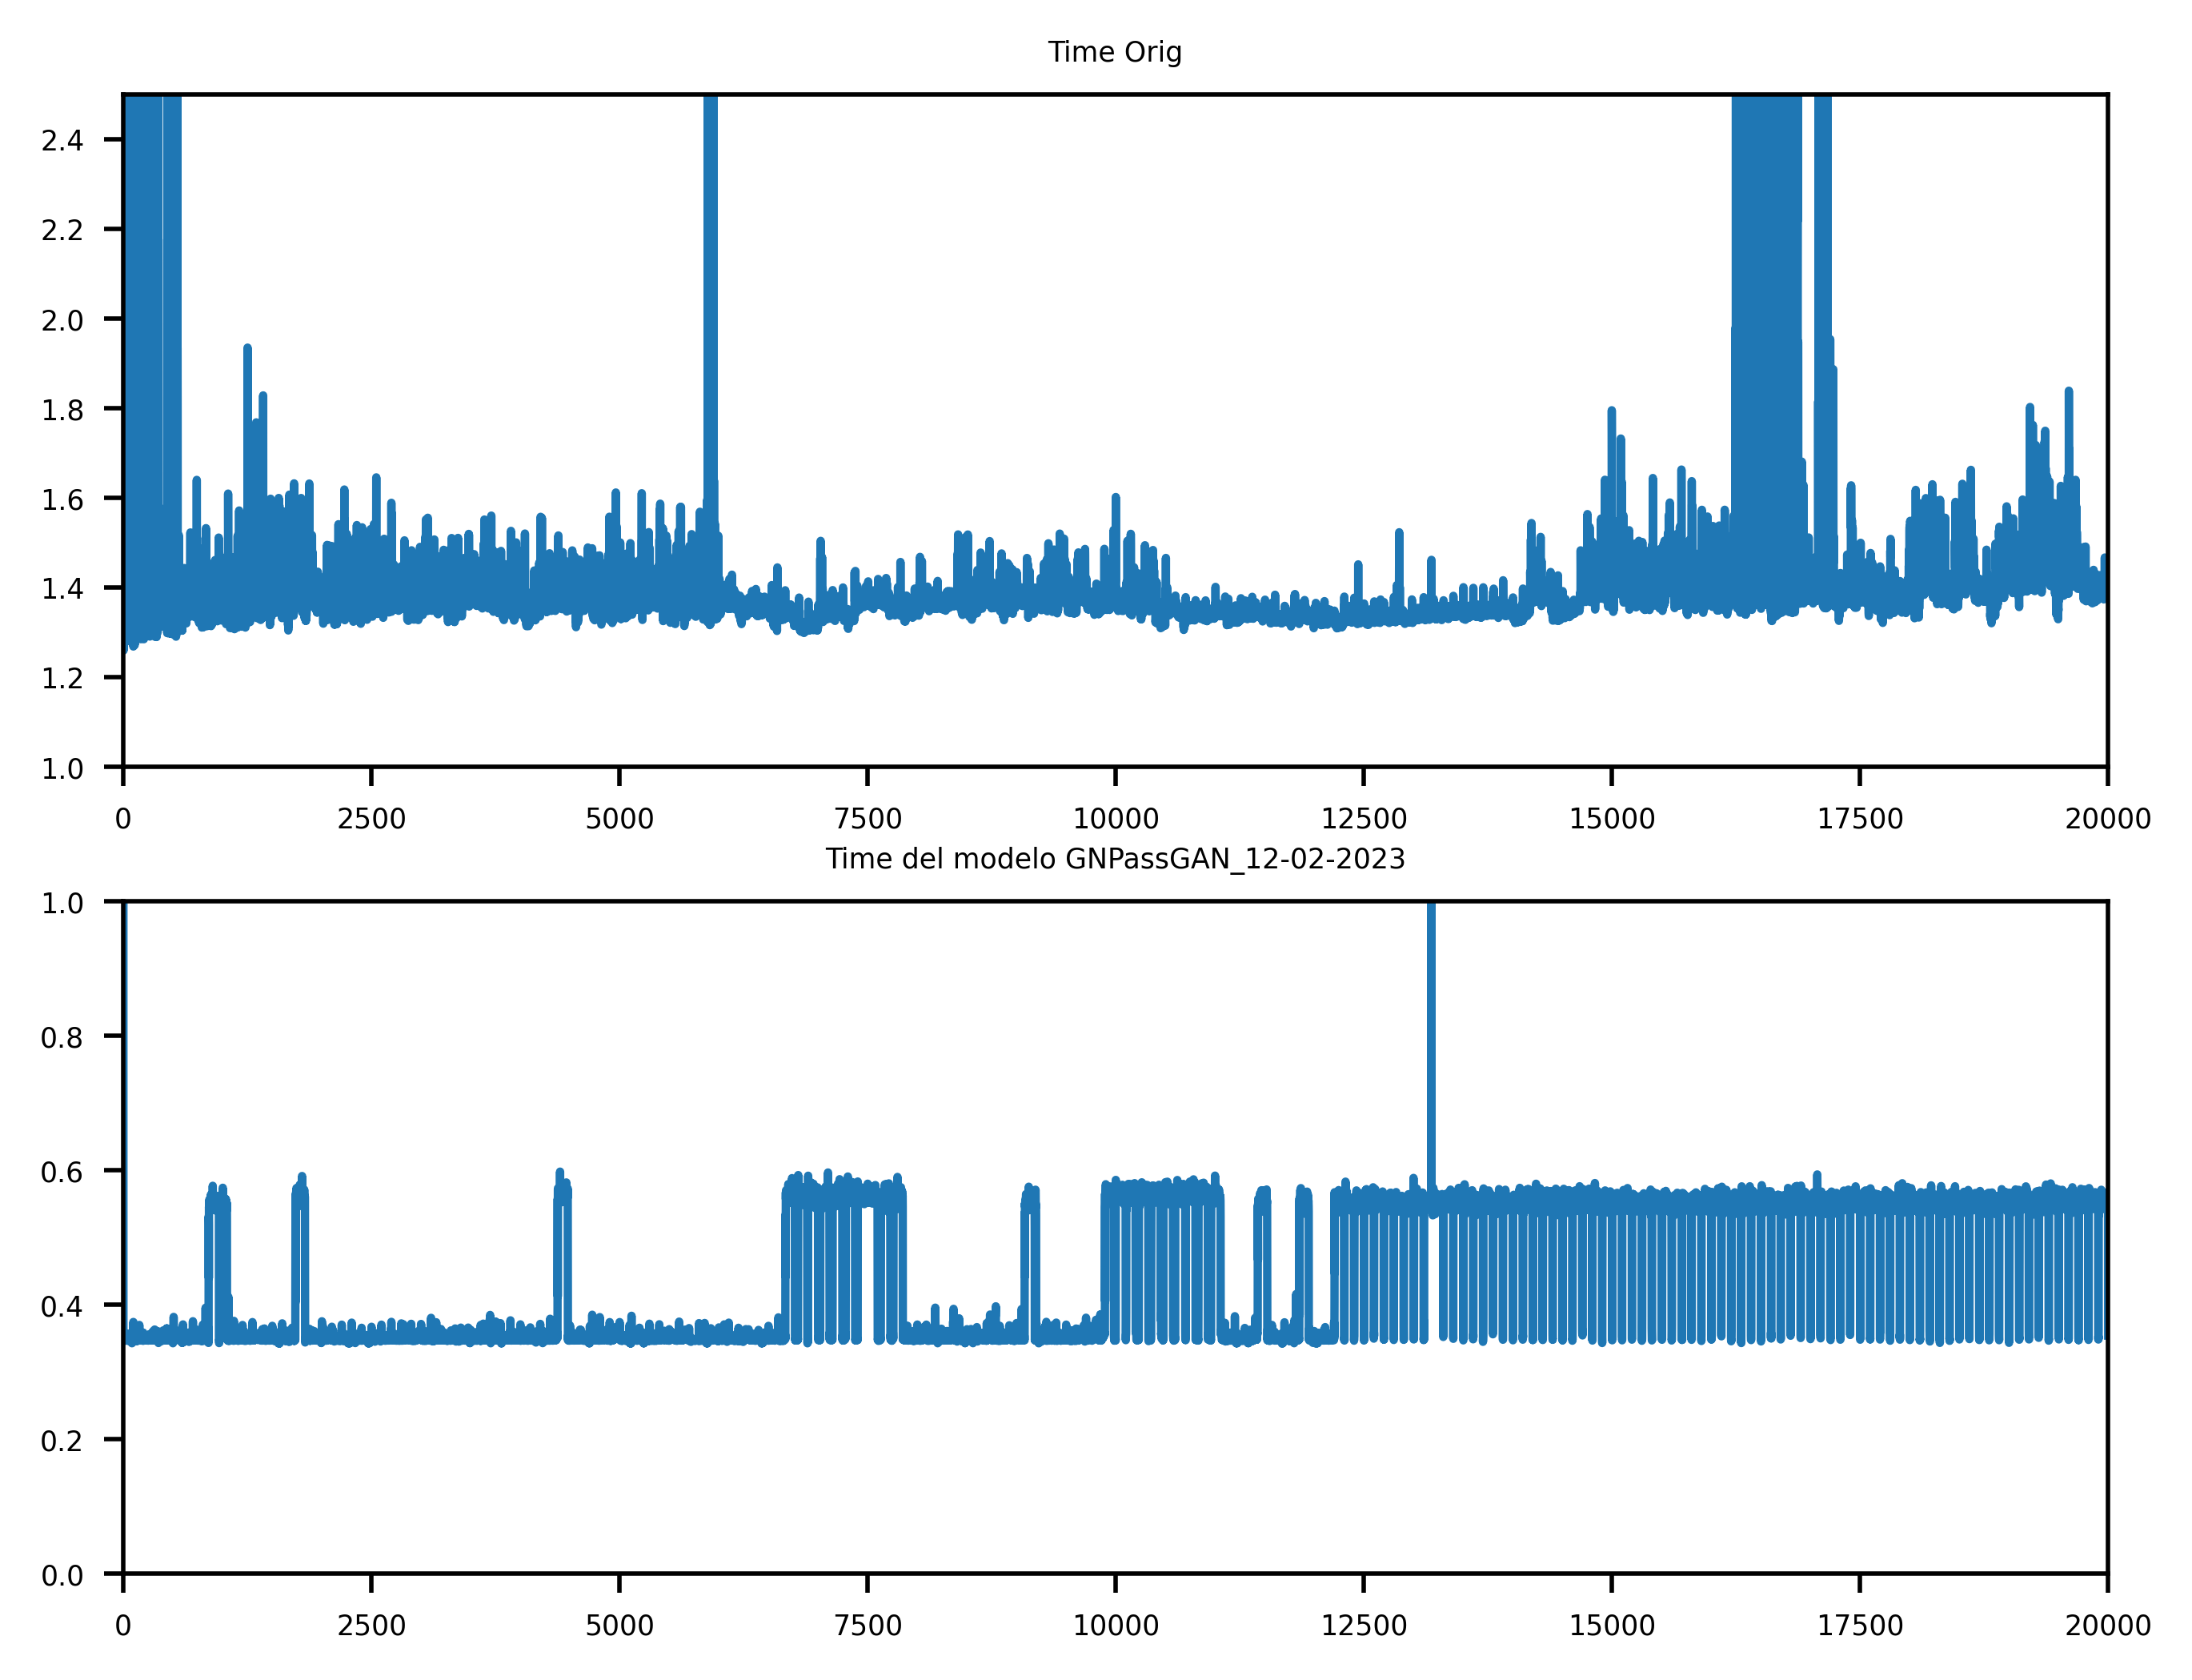

In [218]:
plot_variable(df,df_orig,mesure_col='time',yaxis_limit=True,xaxis_limit=True)

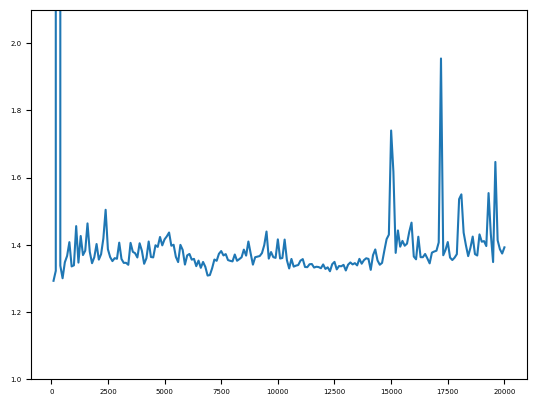

In [161]:
plt.ylim(ymax=2.1, ymin=1)
plt.plot(df_filter['index'],df_filter['time'])

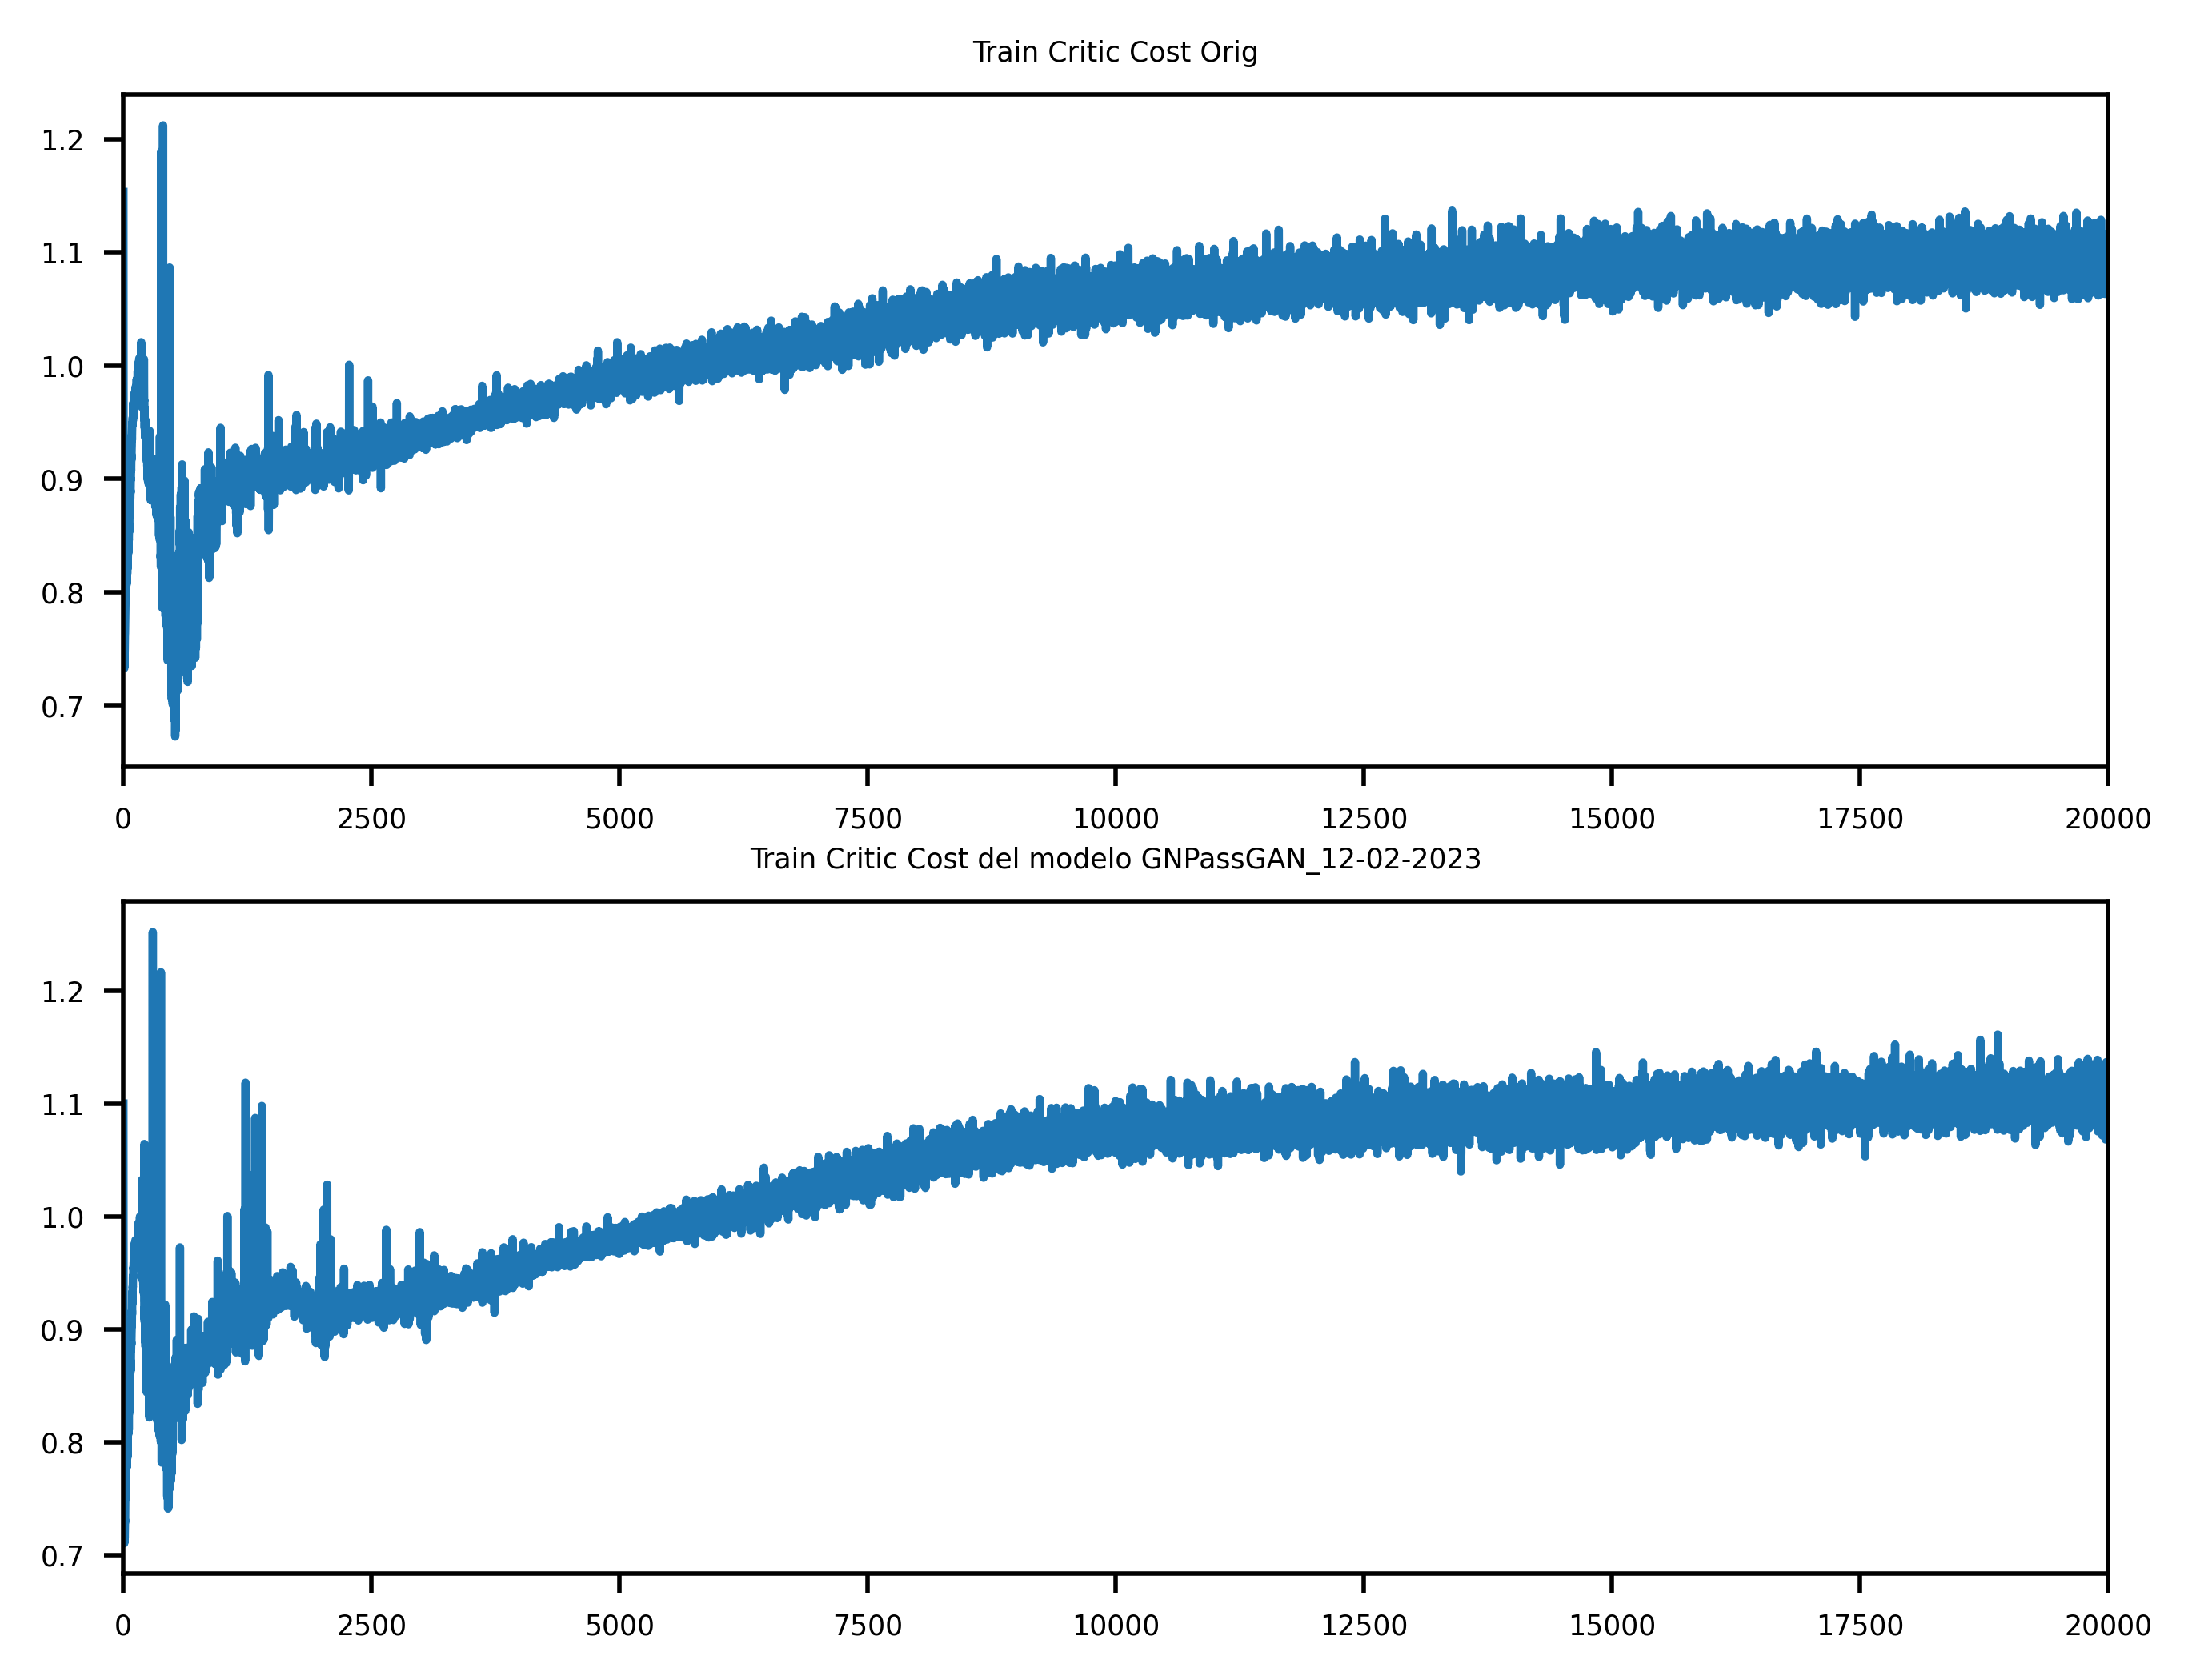

In [219]:
#df.plot('index','train critic cost')
plot_variable(df,df_orig,mesure_col='train critic cost',xaxis_limit=True)

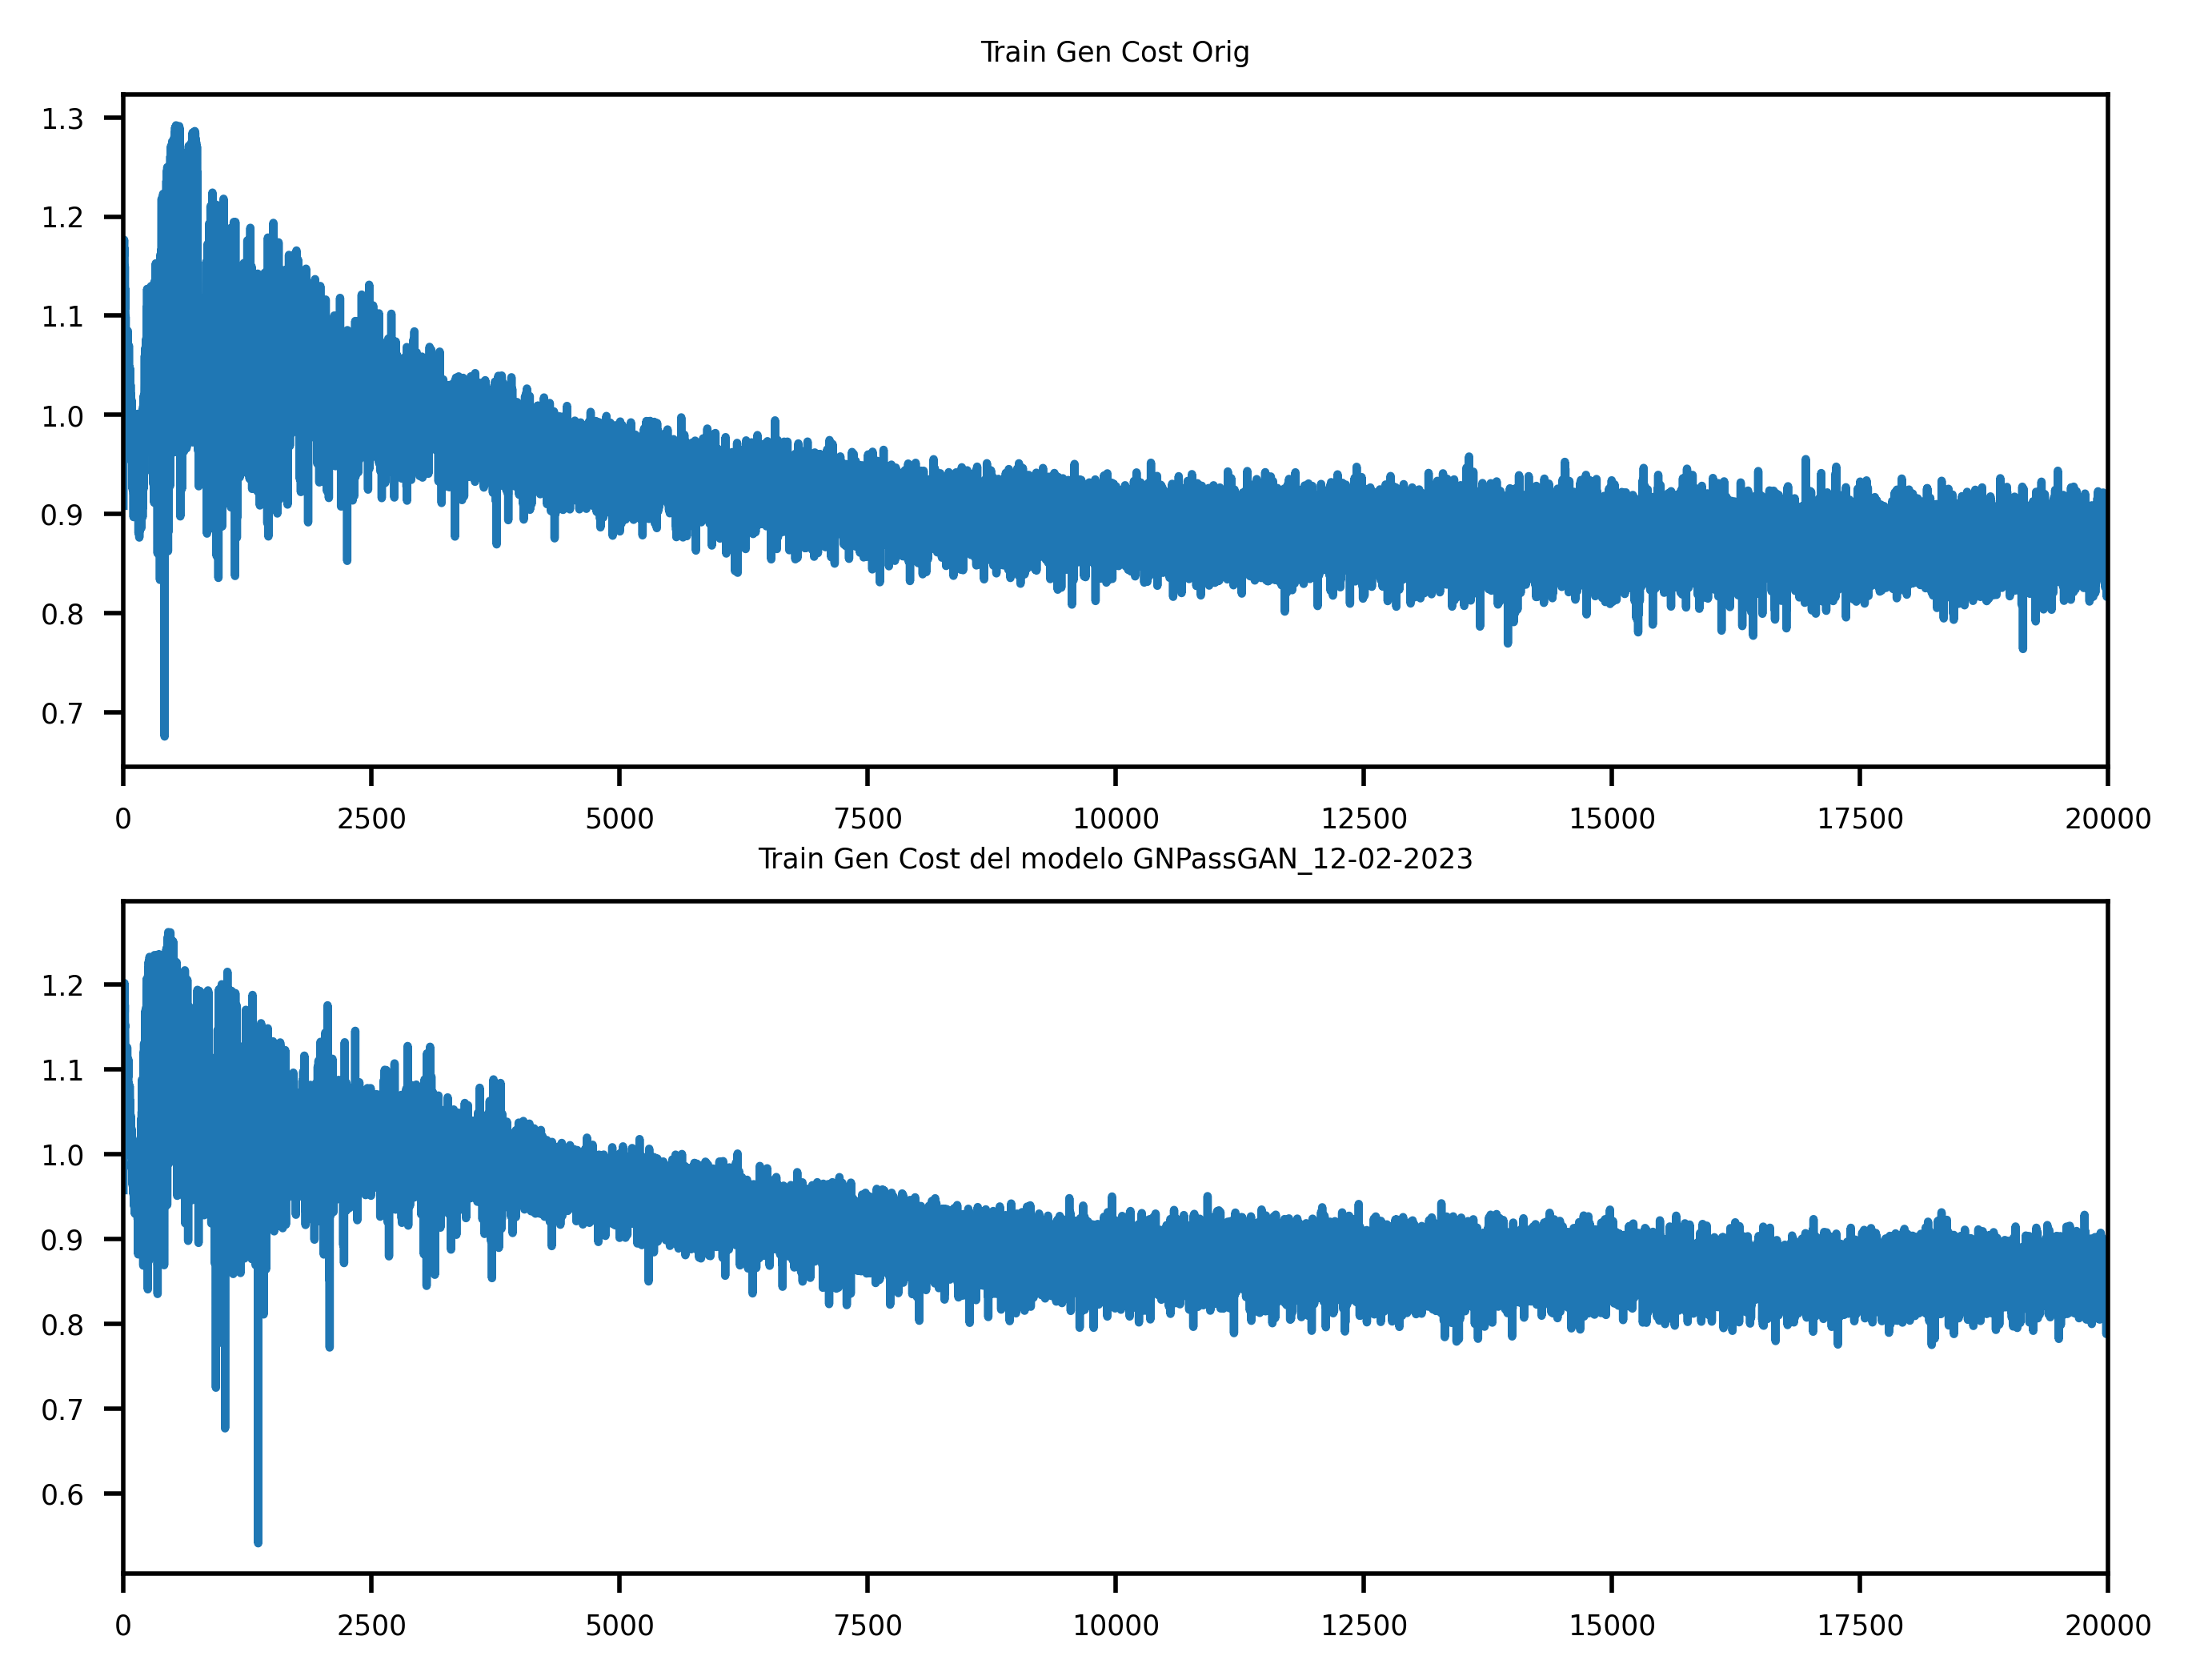

In [220]:
#df.plot('index','train gen cost')
plot_variable(df,df_orig,mesure_col='train gen cost',xaxis_limit=True)

In [221]:
def plot_js(df_filter,xaxis_limit=False):
    fig, axs = plt.subplots(2, 2)
    fig.set_dpi(500)

    plt.rcParams.update({'font.size': 5})
    plt.rc('axes', titlesize=5)     # fontsize of the axes title
    plt.rc('axes', labelsize=5)    # fontsize of the x and y labels

    i=0
    j=0
    for col in ['js1','js2','js3','js4']:#df.columns:
        if col!='index':
            axs[i, j].plot(df_filter['iteracion'], df_filter[col])
            axs[i, j].set_title(col)

            if xaxis_limit:
                axs[i, j].set_xlim([0, 20000])
                
            if j:
                j=0
                i=i+1
            else:
                j=1
    
        



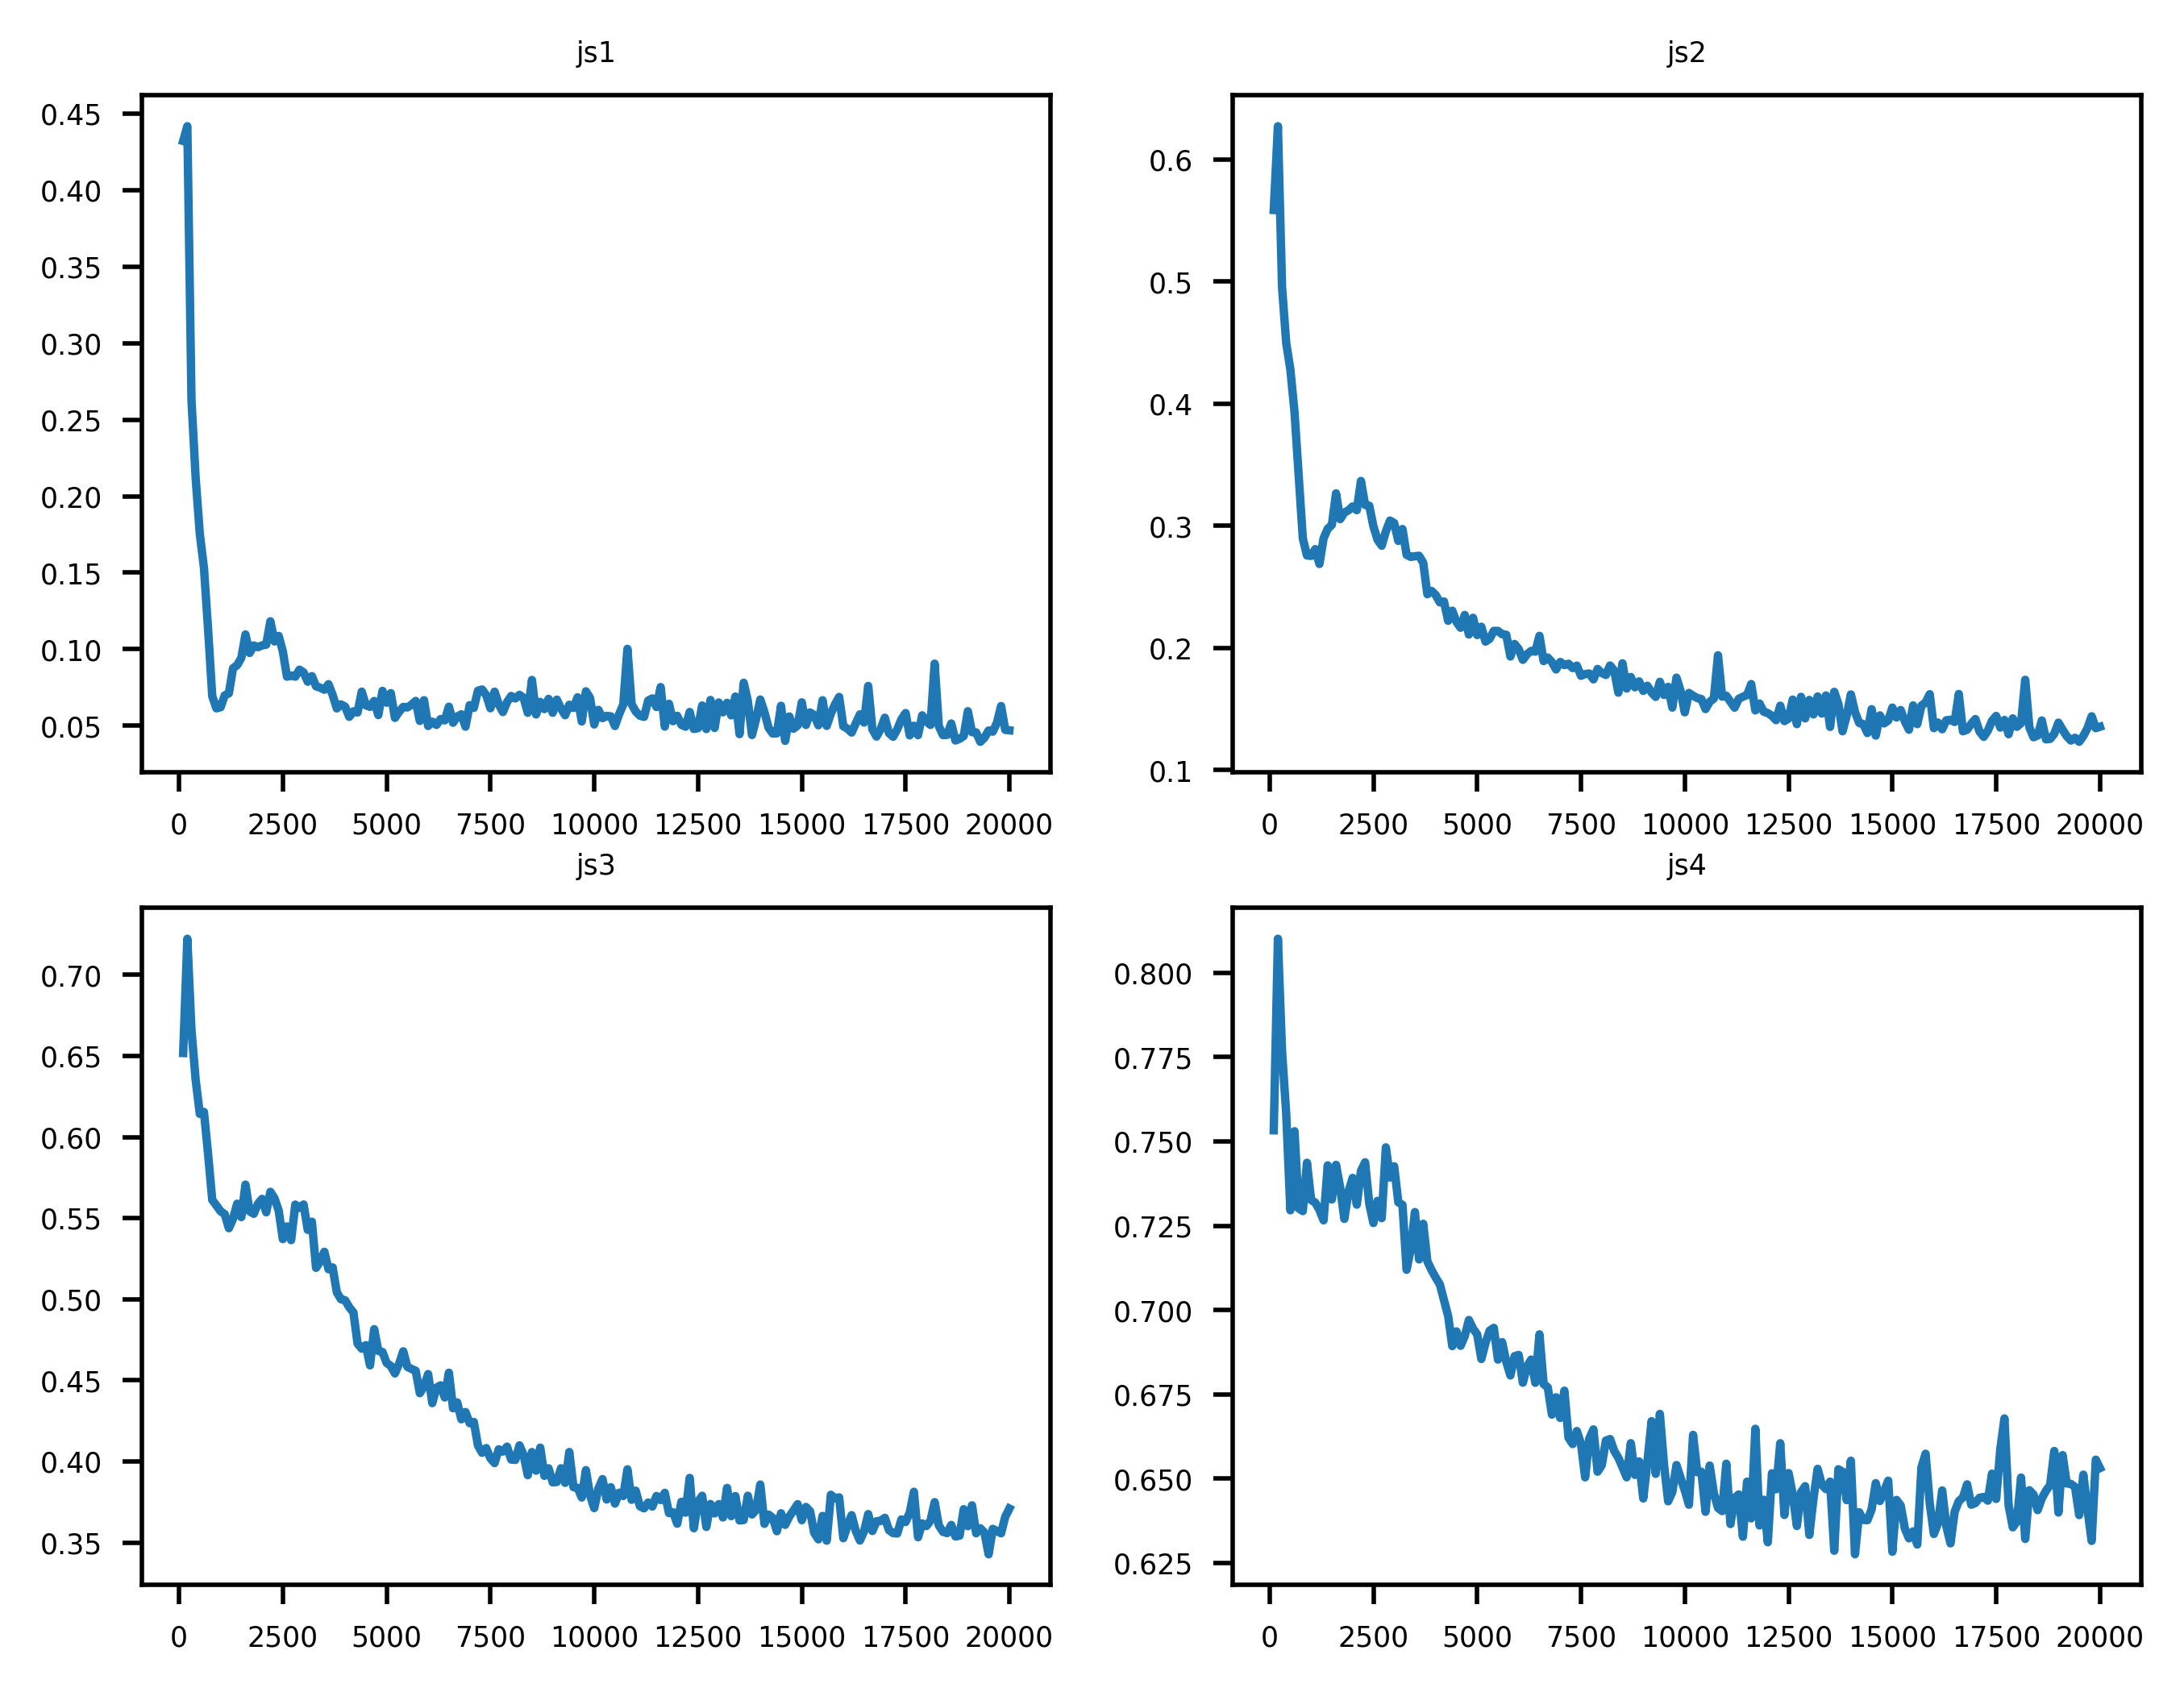

In [222]:
plot_js(df_filter)

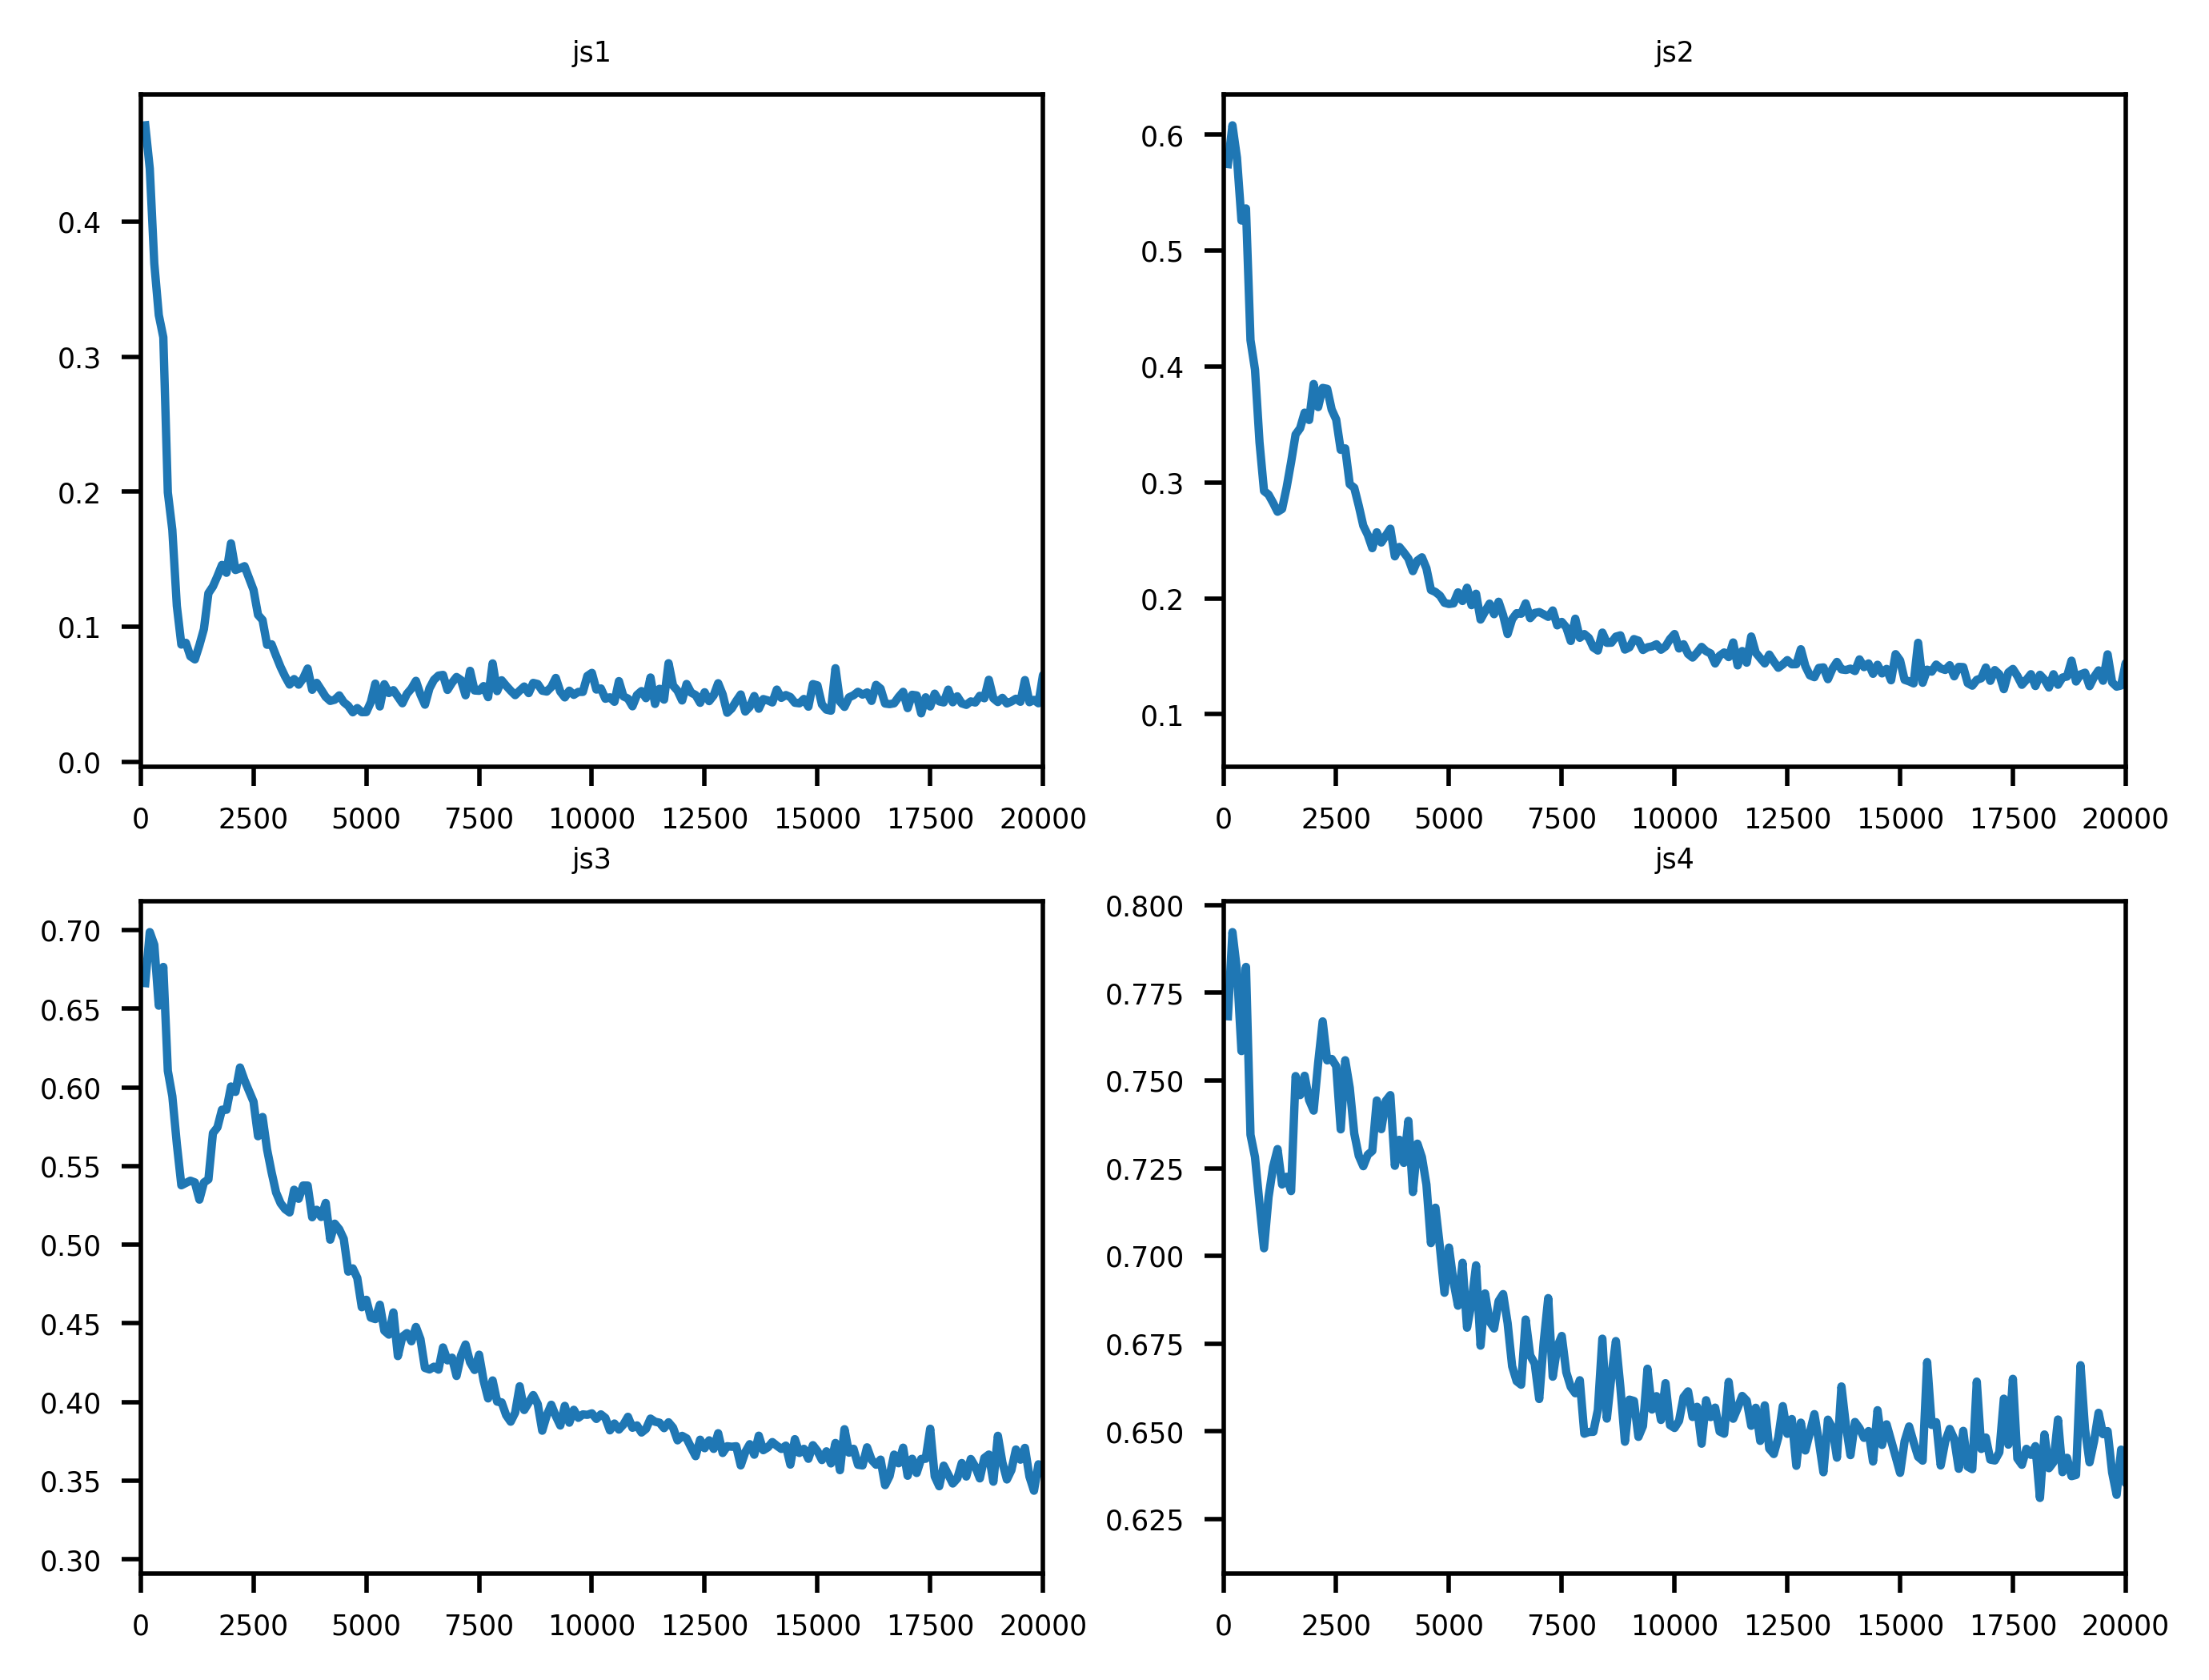

In [223]:
plot_js(df_filter_orig,xaxis_limit=True)